In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
from mpl_toolkits.mplot3d import Axes3D

print(os.getcwd())

/home/mgarcia/Documents/Study/DiploDatos/Repositories/G7/DiploDataScienceG7/Mauri/TP3


In [66]:
df = pd.read_csv('./preprocessed_dataset.csv', index_col=0)
new_df = pd.DataFrame()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116191 entries, 0 to 116580
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116191 non-null  object 
 1   customer_id                    116191 non-null  object 
 2   order_status                   116191 non-null  object 
 3   order_purchase_timestamp       116191 non-null  object 
 4   order_approved_at              116191 non-null  object 
 5   order_delivered_carrier_date   116191 non-null  object 
 6   order_delivered_customer_date  116191 non-null  object 
 7   order_estimated_delivery_date  116191 non-null  object 
 8   order_item_id                  116191 non-null  int64  
 9   product_id                     116191 non-null  object 
 10  seller_id                      116191 non-null  object 
 11  shipping_limit_date            116191 non-null  object 
 12  price                         

In [3]:
by_customer_id = df.groupby(["customer_id"])


In [5]:
new_df['total_payment_value'] = by_customer_id["payment_value"].apply(sum)


In [6]:
new_df.reset_index()

,customer_id,total_payment_value
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
96939,fffcb937e9dd47a13f05ecb8290f4d3e,91.91
96940,fffecc9f79fd8c764f843e9951b11341,81.36
96941,fffeda5b6d849fbd39689bb92087f431,63.13
96942,ffff42319e9b2d713724ae527742af25,214.13


In [7]:
new_df['total_buys'] = by_customer_id['customer_id'].apply(pd.Series.count)

In [12]:
new_df.loc['00012a2ce6f8dcda20d059ce98491703']

total_payment_value    114.74
total_buys               1.00
Name: 00012a2ce6f8dcda20d059ce98491703, dtype: float64

In [13]:
new_df['prefered_payment_type'] = by_customer_id['payment_type'].apply(lambda x:x.mode()[0])

In [14]:
new_df['prefered_payment_installments'] = by_customer_id['payment_installments'].apply(lambda x:x.mode()[0])

In [15]:
new_df['mean_review_score'] = by_customer_id['review_score'].apply(pd.Series.mean)

In [16]:
new_df['mean_products_photos_qty'] = by_customer_id['product_photos_qty'].apply(pd.Series.mean)

In [17]:
new_df['n_different_bought_products'] =  by_customer_id['payment_type'].apply(pd.Series.nunique)

In [18]:
new_df['mean_products_volume'] = by_customer_id['product_volume'].apply(pd.Series.mean)

In [19]:
new_df['mean_products_weight_g'] = by_customer_id['product_weight_g'].apply(pd.Series.mean)

In [20]:
new_df.to_csv('./new_df.csv')

In [21]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english', 'Month_order',
       'order_process_time', 'order_delivery_time', 'order_accuracy_time',
       'order_approv

In [22]:
df.product_category_name_english.value_counts(normalize=True)

bed_bath_table               0.103123
health_beauty                0.085893
sports_leisure               0.077338
furniture_decor              0.075316
computers_accessories        0.069945
                               ...   
arts_and_craftmanship        0.000207
la_cuisine                   0.000138
cds_dvds_musicals            0.000120
fashion_childrens_clothes    0.000069
security_and_services        0.000017
Name: product_category_name_english, Length: 71, dtype: float64

In [23]:
#customer_state(4 categorias, primeras 3 mas otros)
new_df['mean_customer_state'] = by_customer_id['customer_state'].apply(lambda x:x.mode()[0])

customer_state_list=['SP','RJ','MG']
def customer_state_truncate(x):
    if x not in customer_state_list :
        return 'OTROS'
    else:
        return x


new_df['mean_customer_state'] = new_df['mean_customer_state'].apply(lambda row: customer_state_truncate(row))

In [24]:
#seller_state(4 categorias, primeras 3 mas otros)
new_df['mean_seller_state'] = by_customer_id['seller_state'].apply(lambda x:x.mode()[0])

seller_state_list=['SP','PR','MG']
def seller_state_truncate(x):
    if x not in seller_state_list :
        return 'OTROS'
    else:
        return x

new_df['mean_seller_state'] = new_df['mean_seller_state'].apply(lambda row: seller_state_truncate(row))

In [25]:
#mean_order_process_time
new_df['mean_order_process_time'] = by_customer_id['order_process_time'].apply(lambda x:x.mode()[0])
new_df['mean_order_process_time'] = pd.to_timedelta(new_df['mean_order_process_time'],unit='S')
new_df['mean_order_process_days'] = new_df['mean_order_process_time'].dt.days 
new_df['mean_order_process_hour_minute'] = new_df['mean_order_process_time'].dt.components.hours.astype(str) + new_df['mean_order_process_time'].dt.components.minutes.astype(str)

In [26]:
#mean_order_delivery_time
new_df['mean_order_delivery_time'] = by_customer_id['order_delivery_time'].apply(lambda x:x.mode()[0])
new_df['mean_order_delivery_time'] = pd.to_timedelta(new_df['mean_order_delivery_time'],unit='S')
new_df['mean_order_delivery_days'] = new_df['mean_order_delivery_time'].dt.days
new_df['mean_order_delivery_hour_minute'] = new_df['mean_order_delivery_time'].dt.components.hours + new_df['mean_order_delivery_time'].dt.components.minutes

In [27]:
#mean_order_accuracy_time
new_df['mean_order_accuracy_time'] = by_customer_id['order_accuracy_time'].apply(lambda x:x.mode()[0])
new_df['mean_order_accuracy_time'] = pd.to_timedelta(new_df['mean_order_accuracy_time'],unit='S')
new_df['mean_order_accuracy_days'] = new_df['mean_order_accuracy_time'].dt.days
new_df['mean_order_accuracy_hour_minute'] = new_df['mean_order_accuracy_time'].dt.components.hours + new_df['mean_order_accuracy_time'].dt.components.minutes

In [28]:
#mean_order_approved_time'
new_df['mean_order_approved_time'] = by_customer_id['order_approved_time'].apply(lambda x:x.mode()[0])
new_df['mean_order_approved_time'] = pd.to_timedelta(new_df['mean_order_approved_time'],unit='S')
new_df['mean_order_approved_days'] = new_df['mean_order_approved_time'].dt.days
new_df['mean_order_approved_hour_minute'] = new_df['mean_order_approved_time'].dt.components.hours + new_df['mean_order_approved_time'].dt.components.minutes

In [29]:
new_df.columns

Index(['total_payment_value', 'total_buys', 'prefered_payment_type',
       'prefered_payment_installments', 'mean_review_score',
       'mean_products_photos_qty', 'n_different_bought_products',
       'mean_products_volume', 'mean_products_weight_g', 'mean_customer_state',
       'mean_seller_state', 'mean_order_process_time',
       'mean_order_process_days', 'mean_order_process_hour_minute',
       'mean_order_delivery_time', 'mean_order_delivery_days',
       'mean_order_delivery_hour_minute', 'mean_order_accuracy_time',
       'mean_order_accuracy_days', 'mean_order_accuracy_hour_minute',
       'mean_order_approved_time', 'mean_order_approved_days',
       'mean_order_approved_hour_minute'],
      dtype='object')

In [30]:
new_df.drop(['mean_order_process_time','mean_order_delivery_time','mean_order_accuracy_time', 'mean_order_approved_time'], axis='columns', inplace=True)

### Tratamiento de Outliers

In [31]:
new_df.describe()

,total_payment_value,total_buys,prefered_payment_installments,mean_review_score,mean_products_photos_qty,n_different_bought_products,mean_products_volume,mean_products_weight_g,mean_order_process_days,mean_order_delivery_days,mean_order_delivery_hour_minute,mean_order_accuracy_days,mean_order_accuracy_hour_minute,mean_order_approved_days,mean_order_approved_hour_minute
count,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000
mean,207.138952,1.198537,2.903883,4.093551,2.249135,1.022549,15256.788955,2108.019929,12.015463,8.850512,39.821072,10.888606,35.626836,0.264823,24.366180
std,626.445194,0.751232,2.704329,1.339103,1.739502,0.148462,23386.142592,3758.330376,9.450100,8.665194,19.200122,10.113564,17.810162,0.762466,18.361404
min,9.590000,1.000000,0.000000,1.000000,1.000000,1.000000,168.000000,0.000000,0.000000,-17.000000,0.000000,-189.000000,0.000000,0.000000,0.000000
25%,63.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2816.000000,300.000000,6.000000,4.000000,25.000000,6.000000,21.000000,0.000000,12.000000
50%,110.000000,1.000000,2.000000,5.000000,2.000000,1.000000,6480.000000,700.000000,10.000000,7.000000,39.000000,11.000000,35.000000,0.000000,17.000000
75%,197.020000,1.000000,4.000000,5.000000,3.000000,1.000000,18414.000000,1825.000000,15.000000,11.000000,55.000000,16.000000,50.000000,0.000000,33.000000
max,109312.640000,63.000000,24.000000,5.000000,20.000000,2.000000,296208.000000,40425.000000,209.000000,205.000000,82.000000,146.000000,82.000000,60.000000,82.000000


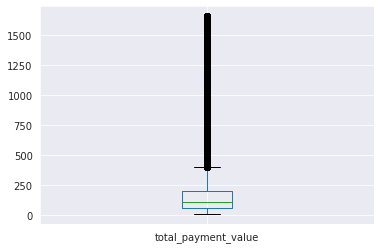

In [32]:
new_df.loc[new_df['total_payment_value']>new_df['total_payment_value'].quantile(0.99),'total_payment_value'] = new_df['total_payment_value'].quantile(0.99)
new_df.boxplot(['total_payment_value'])

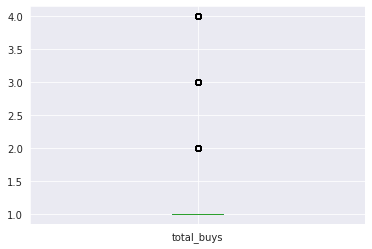

In [33]:
new_df.loc[new_df['total_buys']>new_df['total_buys'].quantile(0.99),'total_buys'] = new_df['total_buys'].quantile(0.99)
new_df.boxplot(['total_buys'])

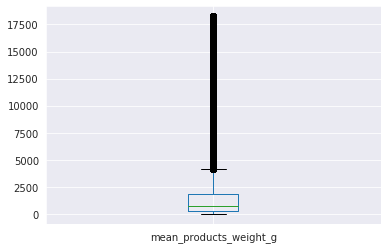

In [34]:
new_df.loc[new_df['mean_products_weight_g']>new_df['mean_products_weight_g'].quantile(0.99),'mean_products_weight_g'] = new_df['mean_products_weight_g'].quantile(0.99)
new_df.boxplot(['mean_products_weight_g'])


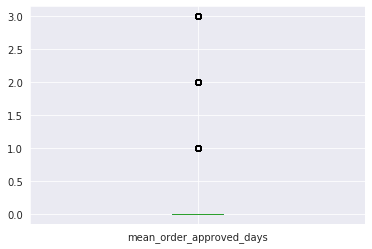

In [35]:
new_df.loc[new_df['mean_order_approved_days']>new_df['mean_order_approved_days'].quantile(0.99),'mean_order_approved_days'] = new_df['mean_order_approved_days'].quantile(0.99)
new_df.boxplot(['mean_order_approved_days'])

In [38]:
new_df.to_pickle('my_pickle.pkl') 

In [58]:
import pandas as pd

In [59]:
new_df = pd.read_pickle('my_pickle.pkl')

In [60]:
new_df.reset_index()

,customer_id,total_payment_value,total_buys,prefered_payment_type,prefered_payment_installments,mean_review_score,mean_products_photos_qty,n_different_bought_products,mean_products_volume,mean_products_weight_g,mean_customer_state,mean_seller_state,mean_order_process_days,mean_order_process_hour_minute,mean_order_delivery_days,mean_order_delivery_hour_minute,mean_order_accuracy_days,mean_order_accuracy_hour_minute,mean_order_approved_days,mean_order_approved_hour_minute
0,00012a2ce6f8dcda20d059ce98491703,114.74,1.0,credit_card,8,1.0,1.0,1,39468.0,4267.0,SP,SP,13,2333,11,9,5,26,0.0,27
1,000161a058600d5901f007fab4c27140,67.41,1.0,credit_card,5,4.0,2.0,1,352.0,150.0,MG,MG,9,917,5,70,9,7,0.0,14
2,0001fd6190edaaf884bcaf3d49edf079,195.42,1.0,credit_card,10,5.0,2.0,1,16905.0,750.0,OTROS,OTROS,5,2151,4,50,15,17,0.0,8
3,0002414f95344307404f0ace7a26f1d5,179.35,1.0,boleto,1,5.0,1.0,1,28800.0,1600.0,MG,OTROS,28,656,25,39,0,56,0.0,15
4,000379cdec625522490c315e70c7a9fb,107.01,1.0,boleto,1,4.0,2.0,1,15300.0,800.0,SP,SP,11,638,9,11,4,41,1.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96939,fffcb937e9dd47a13f05ecb8290f4d3e,91.91,1.0,credit_card,6,5.0,1.0,1,3080.0,1250.0,SP,SP,4,1829,4,26,14,39,0.0,39
96940,fffecc9f79fd8c764f843e9951b11341,81.36,3.0,voucher,1,3.0,3.0,2,20000.0,2050.0,OTROS,SP,12,021,10,53,16,45,0.0,11
96941,fffeda5b6d849fbd39689bb92087f431,63.13,1.0,credit_card,3,4.0,4.0,1,12000.0,350.0,RJ,SP,17,427,14,42,20,61,0.0,18
96942,ffff42319e9b2d713724ae527742af25,214.13,1.0,credit_card,2,5.0,1.0,1,11808.0,2700.0,SP,SP,5,136,2,64,6,31,0.0,23


### Falta tener el customer_id en la tabla y ver que features vamos a utilizar para clusterizar

### Buscamos K

In [61]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [62]:
Nc = range(1, 21) # pruebo con 1 cluster, 2 clusters... 20 clusters
# creo los kmeans
kmeans = []
for i in Nc:
    kmeans.append(KMeans(n_clusters=i))

kmeans

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorit

In [56]:
X = new_df[['total_payment_value', 'total_buys', 'mean_products_photos_qty']]

In [64]:
# ejecuto kmeans con cada uno de los clusters
X = X.sample(frac=0.05)
score = [None] * 20

for i in range(len(kmeans)):
    score[i] = (kmeans[i].fit(X).inertia_)  #score(X))
    
# score nos da 0 si los elementos son muy parecidos, o el "opuesto" al objetivo de kmeans (minimizar distancia)
    

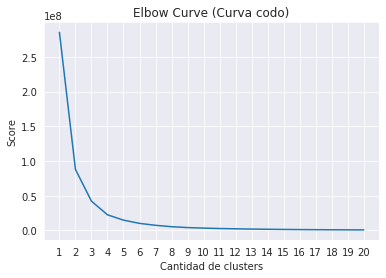

In [65]:
plt.plot(Nc,score)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Score')
plt.title('Elbow Curve (Curva codo)')
plt.xticks(Nc)
plt.show()